# Exploration of ChemProt dataset

In [2]:
import pandas as pd
import re

raw_path = "./"
# processed_path = "./data/chemprot/"
# pre-processed data
dev_file = raw_path + "dev.tsv"
train_file = raw_path + "training/drugprot_training_relations.tsv"
test_file = raw_path + "test.tsv"

In [3]:
df = pd.read_table(train_file, header=None, dtype=str, names=['PMID', 'relation', 'interact arg 1', 'interact arg 2'])
df

,PMID,relation,interact arg 1,interact arg 2
0,23017395,INHIBITOR,Arg1:T15,Arg2:T21
1,23017395,INHIBITOR,Arg1:T16,Arg2:T21
2,12181427,PART-OF,Arg1:T3,Arg2:T22
3,12181427,INHIBITOR,Arg1:T6,Arg2:T23
4,12181427,INHIBITOR,Arg1:T7,Arg2:T23
...,...,...,...,...
17269,17653133,PRODUCT-OF,Arg1:T10,Arg2:T24
17270,17653133,INHIBITOR,Arg1:T12,Arg2:T17
17271,17653133,INHIBITOR,Arg1:T13,Arg2:T17
17272,17653133,SUBSTRATE,Arg1:T3,Arg2:T19


In [4]:
df['relation'].unique()

array(['INHIBITOR', 'PART-OF', 'SUBSTRATE', 'ACTIVATOR',
       'INDIRECT-DOWNREGULATOR', 'ANTAGONIST', 'INDIRECT-UPREGULATOR',
       'AGONIST', 'DIRECT-REGULATOR', 'PRODUCT-OF', 'AGONIST-ACTIVATOR',
       'AGONIST-INHIBITOR', 'SUBSTRATE_PRODUCT-OF'], dtype=object)

In [3]:
df.iloc[1, 1]

'@GENE$ inhibitors currently under investigation include the small molecules @CHEMICAL$ (Iressa, ZD1839) and erlotinib (Tarceva, OSI-774), as well as monoclonal antibodies such as cetuximab (IMC-225, Erbitux).'

In [4]:
def abs_id(id):
    return re.split("\.", id)[0]

In [5]:
df_exp = pd.concat([df, df['id'].str.split('.', expand=True)], axis=1)
df_exp = df_exp.drop('id', axis=1)
df_exp.columns = ['text', 'relation', 'abs', 'e1', 'e2']
df_exp

,text,relation,abs,e1,e2
0,Recent studies have provided consistent eviden...,false,16357751,T1,T2
1,@GENE$ inhibitors currently under investigatio...,CPR:4,14967461,T22,T1
2,@GENE$ inhibitors currently under investigatio...,CPR:4,14967461,T22,T2
3,@GENE$ inhibitors currently under investigatio...,CPR:4,14967461,T22,T3
4,@GENE$ inhibitors currently under investigatio...,CPR:4,14967461,T22,T4
...,...,...,...,...,...
18030,"In hippocampal dentate gyrus, @CHEMICAL$-recei...",CPR:3,17611273,T16,T18
18031,"In hippocampal dentate gyrus, @CHEMICAL$-recei...",CPR:4,17611273,T16,T26
18032,"In hippocampal dentate gyrus, @CHEMICAL$-recei...",CPR:3,17611273,T16,T27
18033,"In medial striatum, @GENE$-ir decreased by 21%...",CPR:4,17611273,T19,T1


In [6]:
unique_relations = df_exp['relation'].unique()
unique_relations

array(['false', 'CPR:4', 'CPR:6', 'CPR:5', 'CPR:9', 'CPR:3'], dtype=object)

<AxesSubplot:>

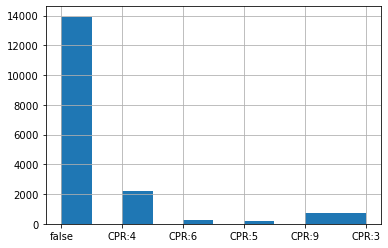

In [7]:
df_exp['relation'].hist()

In [8]:
n_relations = df_exp['relation'].value_counts()
df_rel = pd.DataFrame({'total': n_relations, 'percentage': n_relations * 100 / n_relations.sum()})
df_rel

,total,percentage
false,13923,77.199889
CPR:4,2227,12.348212
CPR:3,756,4.191849
CPR:9,727,4.031051
CPR:6,229,1.269753
CPR:5,173,0.959246


/tmp/ipykernel_7555/1110530460.py:10: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[i].set_xticks([])
/tmp/ipykernel_7555/1110530460.py:10: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[i].set_xticks([])
/tmp/ipykernel_7555/1110530460.py:10: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[i].set_xticks([])
/tmp/ipykernel_7555/1110530460.py:10: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[i].set

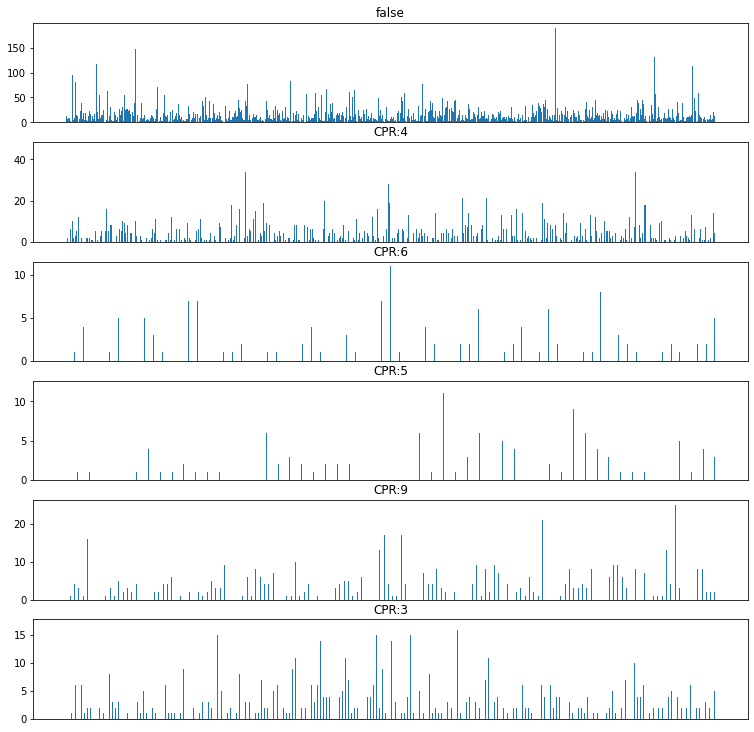

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(unique_relations), figsize=(12.8, 12.8))
for i, relation in enumerate(unique_relations):
    df_tmp = df_exp[df_exp['relation'] == relation]
    ax[i].hist(df_tmp['abs'], bins=df_exp['abs'].nunique())
    ax[i].set_title(f"{relation}")
    ax[i].set_xticklabels([])
    ax[i].set_xticks([])

In [10]:
import numpy as np
import seaborn as sns

max_len = 881
sns.set_theme(style="whitegrid")
freq_dict = {}

for relation in unique_relations:
    freq_dict[relation] = np.empty(max_len)
    # fill with NaN to make arrays equal lenght
    freq_dict[relation][:] = np.NaN
    df_tmp = df_exp[df_exp['relation'] == relation]
    counts = df_tmp['abs'].value_counts().to_numpy()
    freq_dict[relation][:len(counts)] = counts
    

df_abs_freq = pd.DataFrame(freq_dict)
df_abs_freq

,false,CPR:4,CPR:6,CPR:5,CPR:9,CPR:3
0,190.0,46.0,11.0,12.0,25.0,17.0
1,147.0,34.0,8.0,11.0,24.0,16.0
2,131.0,34.0,8.0,9.0,21.0,15.0
3,118.0,28.0,7.0,6.0,17.0,15.0
4,114.0,26.0,7.0,6.0,17.0,15.0
...,...,...,...,...,...,...
876,1.0,NaN,NaN,NaN,NaN,NaN
877,1.0,NaN,NaN,NaN,NaN,NaN
878,1.0,NaN,NaN,NaN,NaN,NaN
879,1.0,NaN,NaN,NaN,NaN,NaN


(-5.0, 50.0)

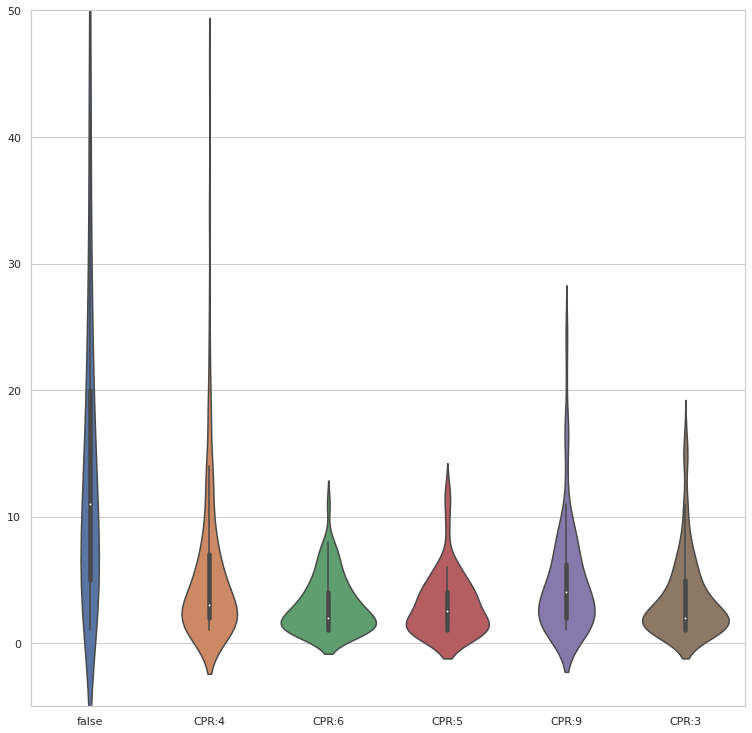

In [11]:
plt.figure(figsize=(12.8, 12.8))
ax = sns.violinplot(data=df_abs_freq)
ax.set_ylim([-5, 50])